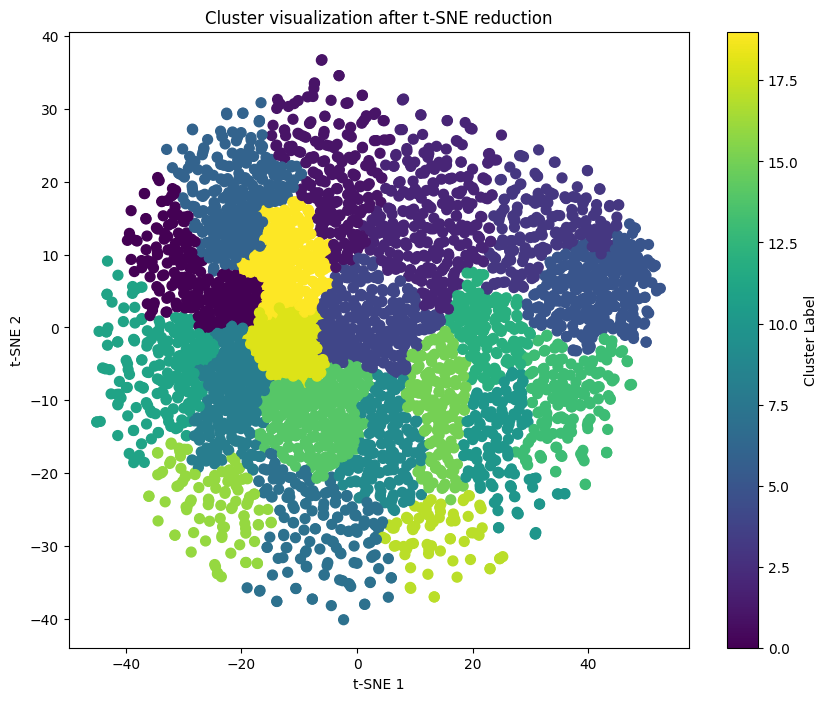

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import TSNE

df = pd.read_csv("/Users/leo/Programming/PLR/Leo/data/dataset_1.csv").drop('Unnamed: 0', axis=1)

# Apply t-SNE for Dimensionality Reduction
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200)
tsne_results = tsne.fit_transform(df)

# Apply Agglomerative Clustering
afc = AgglomerativeClustering(n_clusters=20)
cluster_labels = afc.fit_predict(tsne_results)

# Add cluster labels to the DataFrame
df['cluster'] = cluster_labels

# Plotting the scatterplot
plt.figure(figsize=(10, 8))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.title('Cluster visualization after t-SNE reduction')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.colorbar(label='Cluster Label')
plt.show()

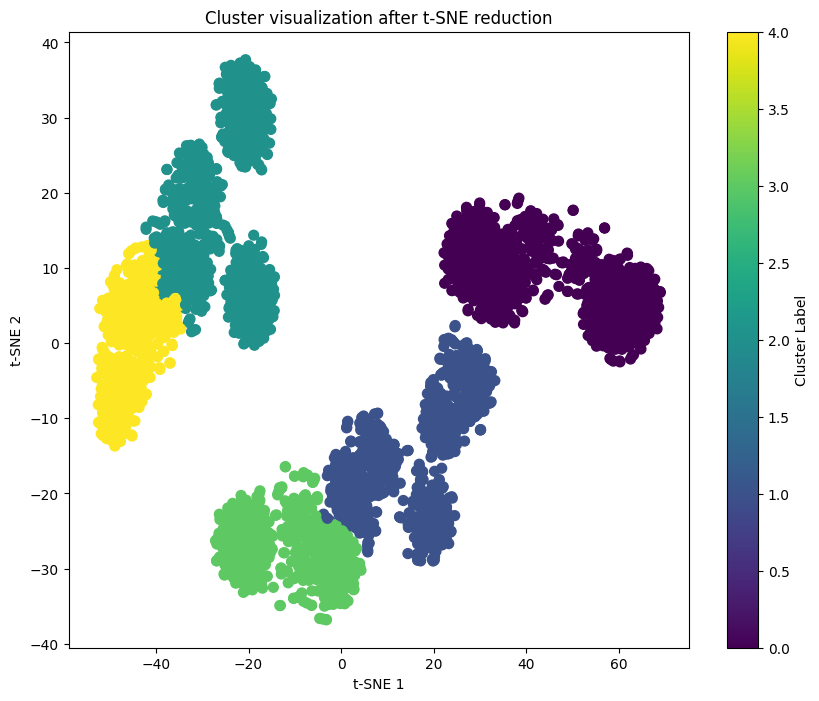

In [2]:
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import pandas as pd

# Apply t-SNE with adjusted perplexity
tsne = TSNE(n_components=2, perplexity=40, learning_rate=200)
tsne_results = tsne.fit_transform(df)

# Apply Agglomerative Clustering
n_clusters = 5
afc = AgglomerativeClustering(n_clusters=n_clusters)
cluster_labels = afc.fit_predict(tsne_results)

# Add cluster labels to the DataFrame
df['cluster'] = cluster_labels

# Plotting the scatterplot
plt.figure(figsize=(10, 8))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.title('Cluster visualization after t-SNE reduction')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.colorbar(label='Cluster Label')
plt.show()

In [6]:
# Add cluster labels to the DataFrame
df['cluster'] = cluster_labels
clusters_df = df.reset_index()
clusters_df = clusters_df[['index', 'cluster']]
clusters_df.rename(columns={'cluster': 'clusters'}, inplace=True)

# Save to CSV
clusters_df.to_csv('clusters.csv', index=False)


In [7]:
df = pd.read_csv("clusters.csv")

In [8]:
df

,index,clusters
0,0,4
1,1,3
2,2,1
3,3,0
4,4,0
...,...,...
4191,4191,3
4192,4192,4
4193,4193,3
4194,4194,0
